# 30509 - Computer Programming

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Monte Carlo Methods
### 1.1 Introduction

Monte Carlo methods are applied to obtain approximate solutions for mathematical problems via statistical sampling simulated on a computer.

For instance, consider the task of approximating $\pi$. This can be performed by  creating a circle of radius $r$ and inscribing it within a square with side length $2r$. By randomly plotting points into the square and counting the number of points generated in the circle provides an approximate area. From this, $\pi$ can be obtained by dividing the area by $r^2$.

'Pi = 3.0680 (Percent Error: 0.02)'

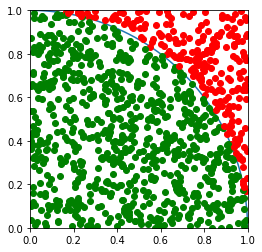

In [5]:
plt.clf()
def ApproximatePi(r=1, n= 1000):
    #defines the axes and fixes the aspect ratio for the plot
    plt.axis([0, r, 0, r]); plt.gca().set_aspect('equal', adjustable='box')
    
    #plots a quarter circle using sin and cos of n-theta values from 0 to pi
    t=np.linspace(0, np.pi/2, n); x=r*np.sin(t); y=r*np.cos(t); plt.plot(x, y)
    
    #initializes the values inside the circle and the sample size
    c = 0; N = n
    
    #plots n-random points and checks if the points are in-/out-side the circle 
    while n > 0:
        pt = r * np.random.random(2); rd = pt[0]**2 + pt[1]**2
        if rd < r**2:
            plt.plot(pt[0], pt[1], 'o', color = 'g')
            c += 1
        else: plt.plot(pt[0], pt[1], 'o', color = 'r')
        n -= 1
    result = 4 * c/N; error = abs((np.pi-result)/np.pi)
    return "Pi = %.4f (Percent Error: %.2f)" % (result, error)
    plt.show()
ApproximatePi()

A similar system can be created to check if a point lies in an irregular-shaped object, i.e. estimating the area of a lake when surveying land.

However, it should be noted that these approximations require large, uniformly distributed samples.

### 1.2 Pseudo-Random Number Generation
To produce reliable approximations, Monte Carlo methods require unlimited sequences of randomly generated numbers based on continuous probability distributions with possibly infinite domain.

However, computers are deterministic, discrete and fininite machines, hence, technically cannot produce *truly* random numbers. Instead most packages are bundled with **pseudo-random number generators** that produce sequences that are virtually indistinguishable from true random numbers.

$$z_m  =  f (A, z_{m-1}, ..., z_{m-p})$$

Pseudo-random number generators have the above characteristic with certain properties:
- sequences are generated from a finite set of number,
- each number is generated as a function of the previous $p$ elements,
- A is a vector of parameters calibrated to maximize the length of the sequence before it repeats
- the function f is topologically transitive: each sub-sequence can be produced by repeatedly computing $f$ and starting from a subsequence of length p,

However, while errors from the Monte Carlo methods themselves can be reduced by increasing sample size, the error due to pseudo-random generation is fixed. Hence, there is an upper-bound for precision while using Monte Carlo methods.

Monte Carlo methods are still preferable as error decreases at $n^{\frac{1}{2}}$ whereas other error decreases by $n^{\frac{1}{m}}$ by using other approximation methods where $m$ refers to the number of dimensions. Furthermore, Monte Carlo methods can be applied to solve problems that consist of continuous (e.g. integral computation) as well as discrete (e.g. counting) functions.

### 1.3 Selecting Sample Size and Accuracy
Monte Carlo methods provide a both point estimatation (approximation) and confindence interval (error-bound) for a given sample size, which positively correlates to computational cost.

To manage the trade-off between computational cost and accuracy, the confidence interval must be carefully selected from which a minimum sample size can be computed.

### 1.4 Comparison with Lattice Method
For a region $R$ within an m-dimensional unit hypercube with volume $[0,1]^m$, the standard method for calculating the volume $\lambda(R)$ containined within a function uses a lattice consisting of $k$ equally spaced partitions in each dimension. This lattice can be used to approximate an upper bound for the volume $\bar{\lambda}(R)_{max}$ by selecting all "sub-cubes" that are at least partially containing the region $R$. Likewise, a lower bound  $\bar{\lambda}(R)_{min}$ can be produced with subcubes that are wholly enclosed within $R$.

The error in the lattice method can be bound by the hypersurface $s(R)$ surrounding region $R$ as all error occurs on the boundary regions. Furthermore, this error can be reduced by increasing the $k$-value, however, this must be done in all $m$ dimensions. Hence, for a selected marging of error $\epsilon$, the error bound can be used to determine the sample size $n$ as follows:

$$|\bar{\lambda}(R) - \lambda(R)| \leq \frac{s(R)}{n^{\frac{1}{m}}} \Rightarrow n(\epsilon) = \Big\lceil \Big(\frac{s(R)}{\epsilon}\Big)^m\Big\rceil$$

Therefore, sample size and by extension computational costs increase exponentially at a scale of $m$ for increasing accuracy, which means this method becomes prohibitively expensive very quickly.

### 1.5 Sampling with Monte Carlo Method
Rather than comparing samples from a defined lattice, a Monte Carlo method draws random samples. For a sample point $x_{j}$, each coordinate is drawn from a uniform distribution such that the samples have the following density function:

$$f(x_j) = \begin{cases} 1 \quad 0 \leq x_{j}^{i} \leq 1 \quad \forall i = 1, ..., m \\0 \quad \text{otherwise} \end{cases}$$
<br><br>

**ALGORITHM 1: Monte Carlo Sampling**

Inputs: Region $\mathcal{R}$, sample size $n$, confidence interval $1-\delta$

Output: an estimated volume $\bar{\lambda}(\mathcal{R})$, confidence interval $[I_1, I_2]$

<br>
$S := 0$; <br>
$\textbf{for } j = 1, ..., n \textbf{ do}:$ <br>
$\quad \forall i = 1, ..., m$ <br>
$\quad \quad x_j^i := Random([0,1]);$ <br>
$\quad \textbf{if} \text{ Inside}(x, \mathcal{R}) \textbf{  then  } \phi_{j} := 1 \textbf{  else  } \phi_{j} := 0$ <br>
$\quad S := S + \phi_{j}$ <br>
**endfor** <br>
$\bar{\lambda}(\mathcal{R}) := S/n;$ <br>
$\textbf{Compute } [I_{1}(S, n, \delta, I_{2}(S, n, \delta)];$

Since $\phi_1, \phi_2, ..., \phi_n$ are independent Bernouli random variables with the following probabilities:


$$\begin{cases} P(\phi_j = 1) = \lambda(R) \forall j = 1, .., n \\
P(\phi_j = 0) = 1 - \lambda(R) \forall j = 1, .., n \end{cases}$$


Therefore, $S = \sum^{n}_{j=1} \phi_j$, which corresponds to the number of samples in $\mathcal{R}$ has the distribution:
$$P(S=i) = {{n}\choose{i}}\cdot\lambda\mathcal{R}^{i} \cdot (1-\lambda(\mathcal{R}))^{n-i} \hspace{0.25in} \forall i = 0, ..., n$$


Therefore, S has expected value $E(S) = n\cdot\lambda(\mathcal{R})$ and variance $\sigma^2(\mathcal{R}) = E(S) \cdot (1-\lambda(\mathcal{R}))$
<br> <br>

With respect to error and sample size, the error obtained from Monte Carlo methods are bounded as per Chebyshev's Inequality that states the following:
$$P\Big(\frac{|X|}{\sigma} \geq \beta \Big) \leq \frac{1}{\beta^2}$$

**Proof - Chebyshev's Inequality** (might not be needed)

For $\epsilon > 0,$
$$P(|X|) \geq \epsilon) = \int_{-\infty}^{-\epsilon} dF(x) + \int^{\infty}_{\epsilon} dF(x) \leq \int_{-\infty}^{-\epsilon} \frac{x^2}{e^2} \cdot dF(x) + \int^{\infty}_{\epsilon} \frac{x^2}{e^2} \cdot dF(x)$$ 
$$\leq \frac{1}{e^2} \cdot \int_{-\infty}^{\infty} x^2 dF(x) = \frac{\sigma^2}{\epsilon^2} $$
Hence, for $\beta = \frac{\epsilon}{\sigma},$ 
$$P(\frac{|X|}{\sigma} \geq \beta) \leq \frac{1}{\beta^2}$$

In [3]:
def MonteCarlo(R, n, delta, dim):
    S = 0
    for j in range(n):
        for i in range(dim):
            pass
    estR, i0, i1 = 0, 0, 0
    return estR, (i0, i1)

## 2. Metropolis Algorithm
### 2.1 Introduction to Stochastic Processes
Consider a sequence of random variable $(X_{0}, X_{1}, ..., X_{t}, ...)$ where $X_t \in \aleph$, the state space where $X_i$ corresponds to the position at time $i$. More importantly, stochastic processes such that:

$$P(X_{t+1} | X_t, \ldots, X_1, X_0) = P(X_{t+1}|X_t)$$

Hence, the probability of any single movement to $x_{t+1}$ is dependent exclusively on the current state $x_t$ and independent of all past positions. The common random walk fall under this category. On the other hand, a non-intersecting random walk is not a Markov chain as previous positions influence future movements.


### 2.2 Primer on Graph Theory
A graph $G = (V,E)$ defined by its the sets of its vertices $V$ and edges $E$

## 3. Simulated Annealing

## 4. Continuous Optimization

NameError: name 'null' is not defined